In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Close all open plots
plt.close('all')

In [14]:
# Load the data
#data_path = 'd:/new_coding/datasets/All rounds in multilpe colab selector + Quantum inspired SimAgg.xlsx'
#data_path = 'd:/new_coding/datasets/All rounds in multilpe colab selector + Olympic SimAgg.xlsx'
#data_path = 'd:/new_coding/datasets/All rounds in multilpe colab selector + SimAgg hmean.xlsx'
data_path = '/Users/Irfan/Documents/MAIN multilpe colab selector + Quantum inspired SimAgg.xlsx' 
data_path = '/Users/Irfan/Documents/Main All rounds in multilpe colab selector + olympic simagg.xlsx' 
graphname = data_path.split('+')[-1].strip().replace('.xlsx', '')  # Get text after `+` and remove `.xlsx`
data_excel = pd.ExcelFile(data_path)
sheet = pd.read_excel(data_excel, sheet_name=0)

In [16]:
# Extract and process data for specific metrics
job_wall_clock_time = sheet[sheet['Metrics'] == 'Job Wall-clock time'].drop(['Rounds', 'Metrics'], axis=1).T
memory_utilized = sheet[sheet['Metrics'] == 'Memory Utilized (GB)'].drop(['Rounds', 'Metrics'], axis=1).T
gpu_energy = sheet[sheet['Metrics'] == 'GPU Energy (Wh)'].drop(['Rounds', 'Metrics'], axis=1).T

#print(job_wall_clock_time.shape)
# Convert time to seconds
job_wall_clock_time['Wall Clock Time (s)'] = job_wall_clock_time.iloc[:, 0].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)
job_wall_clock_time.reset_index(inplace=True)
job_wall_clock_time.columns = ['Experiment','Time', 'Wall Clock Time (s)']

memory_utilized.reset_index(inplace=True)
memory_utilized.columns = ['Experiment', 'Memory Utilized (GB)']

gpu_energy.reset_index(inplace=True)
gpu_energy.columns = ['Experiment', 'GPU Energy (Wh)']

# Define the 'husl' color palette
custom_palette = sns.color_palette("husl", 12)  # Ensure we have enough colors for all experiments
xaxislabel=['KG', 'LP', 'GA', 'TS', 'MA', 'SA', 'FL', 'ACO', 'ICO', 'SDS', 'QL', 'KWTA']

/var/folders/46/65gf3s0527s01rk66p5zh3c00000gn/T/ipykernel_9168/877888219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_wall_clock_time, x='Experiment', y=job_wall_clock_time['Wall Clock Time (s)'], palette=custom_palette, ax=axes[i])
/var/folders/46/65gf3s0527s01rk66p5zh3c00000gn/T/ipykernel_9168/877888219.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(xaxislabel, rotation=ROTATION)
/var/folders/46/65gf3s0527s01rk66p5zh3c00000gn/T/ipykernel_9168/877888219.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=memory_utilized, x='Experiment', y=memory_utilized

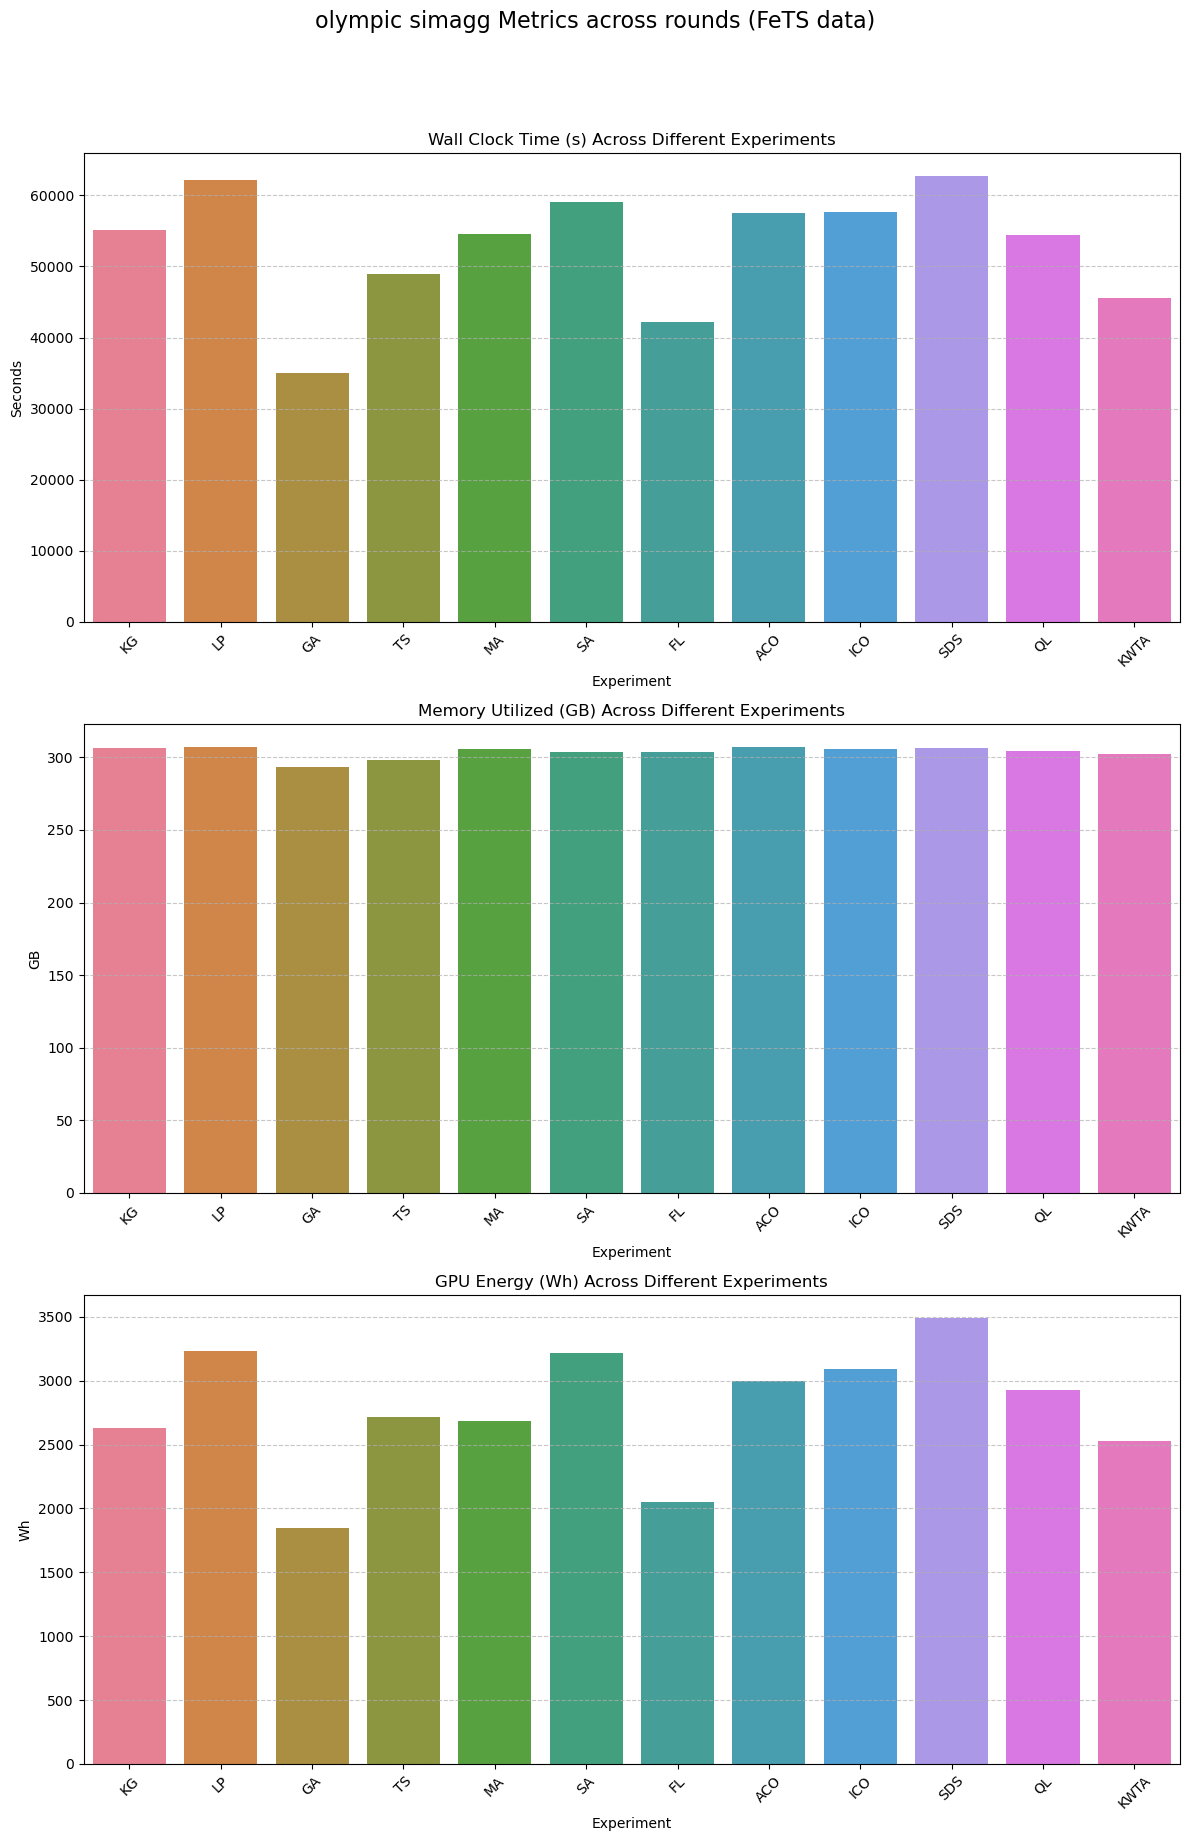

In [18]:
# Plotting with the 'husl' color palette
fig, axes = plt.subplots(3, 1, figsize=(12, 18))#, sharex=True)
#fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Plot 1: Job Wall Clock Time
i=0
ROTATION=45
#sns.barplot(data=job_wall_clock_time, x=job_wall_clock_time['Experiment'], y=job_wall_clock_time['Wall Clock Time (s)'], palette=custom_palette, ax=axes[i])
sns.barplot(data=job_wall_clock_time, x='Experiment', y=job_wall_clock_time['Wall Clock Time (s)'], palette=custom_palette, ax=axes[i])
#axes[i].set_title('Job Wall Clock Time Across Different Experiments')
axes[i].set_title(f'{job_wall_clock_time.columns[2]} Across Different Experiments')
axes[i].set_ylabel('Seconds')
axes[i].set_xticklabels(xaxislabel, rotation=ROTATION)
axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Enable grid with dashed lines

# Plot 2: Memory Utilized
i=1
#sns.barplot(data=memory_utilized, x=memory_utilized['Experiment'], y=memory_utilized['Memory Utilized (GB)'], palette=custom_palette, ax=axes[i])
sns.barplot(data=memory_utilized, x='Experiment', y=memory_utilized['Memory Utilized (GB)'], palette=custom_palette, ax=axes[i])
#axes[i].set_title('Memory Utilized (GB) Across Different Experiments')
axes[i].set_title(f'{memory_utilized.columns[1]} Across Different Experiments')
axes[i].set_ylabel('GB')
axes[i].set_xticklabels(xaxislabel, rotation=ROTATION)
axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Enable grid with dashed lines

# Plot 3: GPU Energy
i=2
#sns.barplot(data=gpu_energy, x=gpu_energy['Experiment'], y=gpu_energy['GPU Energy (Wh)'], palette=custom_palette, ax=axes[i])
sns.barplot(data=gpu_energy, x='Experiment', y=gpu_energy['GPU Energy (Wh)'], palette=custom_palette, ax=axes[i])
#axes[i].set_title('GPU Energy (Wh) Across Different Experiments')
axes[i].set_title(f'{gpu_energy.columns[1]} Across Different Experiments')
axes[i].set_ylabel('Wh')
#axes[i].set_xlabel(xaxislabel)
axes[i].set_xticklabels(xaxislabel, rotation=ROTATION)
axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Enable grid with dashed lines

#for ax in axes:
#    ax.set_xticks(range(len(xaxislabel)))  # Set tick positions
#    ax.set_xticklabels(xaxislabel, rotation=ROTATION)  # Apply labels

plt.tight_layout(rect=[0, 0, 1, 0.96])

#fig.suptitle('Quantum Inspired SimAgg Metrics across rounds (FeTS data)', fontsize=16, y=1.02)
fig.suptitle(f'{graphname} Metrics across rounds (FeTS data)', fontsize=16, y=1.02)
plt.savefig(f'/Users/Irfan/Documents//09feb2025plot13_{graphname}.png', bbox_inches='tight')

plt.show()

In [10]:
plt.savefig(f'/Users/Irfan/Documents//09feb2025plot13_{graphname}.png', bbox_inches='tight')

plt.show()

<Figure size 640x480 with 0 Axes>